In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
# ----------------------------------------------------------------------------------------------
# 1. Load the transformed data
# ----------------------------------------------------------------------------------------------

# Load the transformed data
df = pd.read_csv("../../data/processed/processed_melbourne_data.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Price_USD
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,776250.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1098750.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1200000.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,1407000.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1227000.0


In [ ]:
df.shape

(5969, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5969 non-null   object 
 1   Address        5969 non-null   object 
 2   Rooms          5969 non-null   int64  
 3   Type           5969 non-null   object 
 4   Price          5969 non-null   float64
 5   Method         5969 non-null   object 
 6   SellerG        5969 non-null   object 
 7   Date           5969 non-null   object 
 8   Distance       5969 non-null   float64
 9   Postcode       5969 non-null   float64
 10  Bedroom2       5969 non-null   float64
 11  Bathroom       5969 non-null   float64
 12  Car            5819 non-null   float64
 13  Landsize       5281 non-null   float64
 14  BuildingArea   5969 non-null   float64
 15  YearBuilt      5822 non-null   float64
 16  CouncilArea    5969 non-null   object 
 17  Latitude       5966 non-null   float64
 18  Longitud

In [ ]:
df["Price_USD"].mean()

751858.2846372927

In [ ]:
# ----------------------------------------------------------------------------------------------
# 2. Split the data into features and target
# ----------------------------------------------------------------------------------------------

# Split the data into features and target
X = df[["Longitude", "Latitude"]]
y = df["Price_USD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# # Reshape the data
# X_train = X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4775, 2), (1194, 2), (4775,), (1194,))

In [ ]:
# ----------------------------------------------------------------------------------------------
# 3. Build Model Baseline
# ----------------------------------------------------------------------------------------------

y_mean = y_train.mean()
y_mean

752859.1856544502

In [ ]:
# Create a dumb model
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[752859.1856544502,
 752859.1856544502,
 752859.1856544502,
 752859.1856544502,
 752859.1856544502]

In [ ]:
len(y_pred_baseline) == len(y_train)

True

In [ ]:
# ----------------------------------------------------------------------------------------------
# Calculate the baseline mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean h price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))
"""
If an apartment 'Type' 'h' is always predicted at price $752,859.19
the the predictions would be off by an average of $241,499.33. It also means that
the model needs to have mean absolute error below $241,499.33 in order to be useful.
"""

Mean h price 752859.19
Baseline MAE: 241499.33


"\nIf an apartment 'Type' 'h' is always predicted at price $752,859.19\nthe the predictions would be off by an average of $241,499.33. It also means that\nthe model needs to have mean absolute error below $241,499.33 in order to be useful.\n"

In [ ]:
# ----------------------------------------------------------------------------------------------
# 4. Iterate on the model
# ----------------------------------------------------------------------------------------------

# Instantiate the model
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

# Fit the model
model.fit(X_train, y_train)

# Check your that model is fitted
check_is_fitted(model)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4775, 2), (1194, 2), (4775,), (1194,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4775 entries, 2409 to 860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  4774 non-null   float64
 1   Latitude   4774 non-null   float64
dtypes: float64(2)
memory usage: 111.9 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4775 entries, 2409 to 860
Series name: Price_USD
Non-Null Count  Dtype  
--------------  -----  
4775 non-null   float64
dtypes: float64(1)
memory usage: 74.6 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5969 non-null   object 
 1   Address        5969 non-null   object 
 2   Rooms          5969 non-null   int64  
 3   Type           5969 non-null   object 
 4   Price          5969 non-null   float64
 5   Method         5969 non-null   object 
 6   SellerG        5969 non-null   object 
 7   Date           5969 non-null   object 
 8   Distance       5969 non-null   float64
 9   Postcode       5969 non-null   float64
 10  Bedroom2       5969 non-null   float64
 11  Bathroom       5969 non-null   float64
 12  Car            5819 non-null   float64
 13  Landsize       5281 non-null   float64
 14  BuildingArea   5969 non-null   float64
 15  YearBuilt      5822 non-null   float64
 16  CouncilArea    5969 non-null   object 
 17  Latitude       5966 non-null   float64
 18  Longitud

In [ ]:
len(df) * 0.8

4775.2

In [ ]:
len(df) * 0.2

1193.8

In [ ]:
# ----------------------------------------------------------------------------------------------
# 6. Evaluate the model performance on the training set
# ----------------------------------------------------------------------------------------------

# Make predictions on the training set
y_pred_training = model.predict(X_train)

In [ ]:
y_pred_training[:5]

array([718633.91780072, 746576.55974902, 806858.84375457, 787360.11995609,
       726414.57167953])

In [ ]:
# Calculate the MAE for predictions in y_pred_training against the actual values in y_train
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 220095.21


In [ ]:
# ----------------------------------------------------------------------------------------------
# 5. Make predictions on the test set and evaluate the model performance on the test set
# ----------------------------------------------------------------------------------------------

# Make predictions on the test set
y_pred = pd.Series(model.predict(X_test))
y_pred[:5]

0    864798.424882
1    856295.337949
2    677171.141148
3    851980.347620
4    910657.434608
dtype: float64

In [ ]:
# Calculate the MAE for predictions in y_pred against the actual values in y_test
mae_testing = mean_absolute_error(y_test, y_pred)
print("Testing MAE:", round(mae_testing, 2))

Testing MAE: 217255.91


In [ ]:
# ----------------------------------------------------------------------------------------------
# 7.  Communicate the results
# ----------------------------------------------------------------------------------------------

# Extract the model parameters
intercept = model.named_steps["linearregression"].intercept_.round()
coefficient = model.named_steps["linearregression"].coef_.round()
print("Model Intercept:", intercept)
print('Model coefficient for "Lat-Lon":', coefficient)

print(f"Location Price = {intercept} + {coefficient} * Lat-Lon")

Model Intercept: -82643922.0
Model coefficient for "Lat-Lon": [ 407363. -643890.]
Location Price = -82643922.0 + [ 407363. -643890.] * Lat-Lon


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualize the model on a 3D scatter plot
fig = px.scatter_3d(
    df,
    x="Longitude",
    y="Latitude",
    z="Price_USD",
    labels={
        "Longitude": "longitude",
        "Latitude": "latitude",
        "Price_USD": "price",
    },
    width=600,
    height=500,
)
# Create x and y coordinates for model representation
x_plane = np.linspace(df["Longitude"].min(), df["Longitude"].max(), 10)
y_plane = np.linspace(df["Latitude"].min(), df["Latitude"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)
# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"Longitude": x_plane, "Latitude": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [ ]:
import seaborn as sns

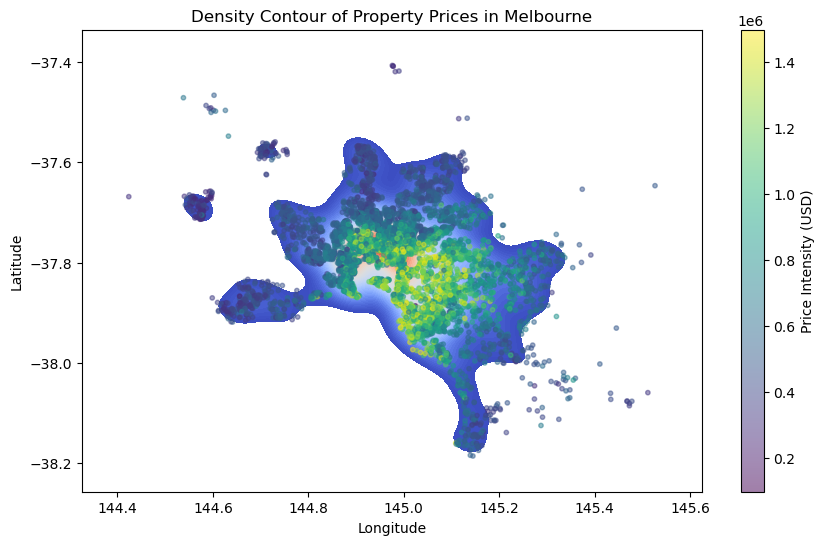

In [ ]:
# ----------------------------------------------------------------------------------------------

# Density contour plot to visualize price variations based on latitude and longitude
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df["Longitude"],
    y=df["Latitude"],
    weights=df["Price_USD"],
    cmap="coolwarm",
    fill=True,
    levels=50,
)
plt.scatter(
    df["Longitude"], df["Latitude"], c=df["Price_USD"], cmap="viridis", alpha=0.5, s=10
)
plt.colorbar(label="Price Intensity (USD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density Contour of Property Prices in Melbourne")

# Show the plot
plt.show();

In [ ]:
# ----------------------------------------------------------------------------------------------

# Check correlation between Price and Latitude/Longitude
correlation = df[["Price_USD", "Latitude", "Longitude"]].corr()
correlation

,Price_USD,Latitude,Longitude
Price_USD,1.000000,-0.300609,0.272632
Latitude,-0.300609,1.000000,-0.334494
Longitude,0.272632,-0.334494,1.000000


In [ ]:
# ----------------------------------------------------------------------------------------------

# Check correlation between Price and Latitude/Longitude
correlation = df[["Price_USD", "Latitude", "Longitude"]].corr()
correlation

# ----------------------------------------------------------------------------------------------
"""
## Based on the provided metrics:  

- **Mean house price (price_usd)**: $752,859.19  
- **Baseline MAE**: $241,499.33  
- **Testing MAE**: $217,255.91  

## Interpretation of Model Performance:  

### **Baseline MAE**:  
The baseline MAE of $241,499.33 represents the average error if the mean house price is always  
predicted for all properties.  

### **Testing MAE**:  
The testing MAE of $217,255.91 represents the average error of the linear regression model on  
the test set.  

---

### Analysis of Property Prices Based on Location:  

**Key Observations (Subsetted for Prices < $1,500,000)**:  
- **Highest Prices**: The most expensive properties in this dataset are in the **Central and Eastern regions**.  
- **Lowest Prices**: The **Western and Northern regions** have the lowest property values.  

### Geospatial Insights:  
- The **Central East** region has the highest-priced properties in this subset, likely due to its proximity to  
  premium residential areas and economic hubs.  
- The **West and North remain the most affordable**, aligning with historical price trends.  

### General Market Classification (Based on This Subset):  
- **Most Expensive Regions**: Central and Eastern suburbs.  
- **Most Affordable Regions**: Western and Northern suburbs.  

### Conclusion:  
- **For buyers looking under $1.5M**, the **Central and Eastern regions** still command higher prices.  
- The **West and North offer more budget-friendly options**, making them ideal for affordability-focused buyers.  

This analysis is specific to properties **below $1.5M**. Including all prices might shift these trends.  
"""

'\n## Based on the provided metrics:  \n\n- **Mean house price (price_usd)**: $752,859.19  \n- **Baseline MAE**: $241,499.33  \n- **Testing MAE**: $217,255.91  \n\n## Interpretation of Model Performance:  \n\n### **Baseline MAE**:  \nThe baseline MAE of $241,499.33 represents the average error if the mean house price is always  \npredicted for all properties.  \n\n### **Testing MAE**:  \nThe testing MAE of $217,255.91 represents the average error of the linear regression model on  \nthe test set.  \n\n---\n\n### Analysis of Property Prices Based on Location:  \n\n**Key Observations (Subsetted for Prices < $1,500,000)**:  \n- **Highest Prices**: The most expensive properties in this dataset are in the **Central and Eastern regions**.  \n- **Lowest Prices**: The **Western and Northern regions** have the lowest property values.  \n\n### Geospatial Insights:  \n- The **Central East** region has the highest-priced properties in this subset, likely due to its proximity to  \n  premium reside

In [ ]:
# ----------------------------------------------------------------------------------------------
# 8. Save the model and Reload the model
# ----------------------------------------------------------------------------------------------

# Save the model to 'models' folder using joblib
joblib.dump(model, "../../models/price_by_location_model.pkl")

['../../models/price_by_location_model.pkl']

In [ ]:
# Load the model from the 'models' folder
model = joblib.load("../../models/price_by_location_model.pkl")

# Check the model
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])